In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_json('news_dataset.json')
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [4]:
df['category'].value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [12]:
df_bussiness = df[df['category']=='BUSINESS'].sample(1381,random_state=1000)
df_SPORTS = df[df['category']=='SPORTS'].sample(1381,random_state=1000)
df_CRIME = df[df['category']=='CRIME'].sample(1381,random_state=1000)
df_SCIENCE = df[df['category']=='SCIENCE'].sample(1381,random_state=1000)

In [13]:
df = pd.concat([df_bussiness,df_SPORTS,df_CRIME,df_SCIENCE],axis=0)

In [14]:
df

,text,category
5318,The Job Market Is Still Years Away From A Full...,BUSINESS
6286,Establishing a Solid Legal Foundation for Your...,BUSINESS
3320,"Gender Diversity on Boards: Good, Bad or Indif...",BUSINESS
2844,Volunteering Surprisingly Makes You Feel Like ...,BUSINESS
9903,How Managers Can Hire Employees More Effectively,BUSINESS
...,...,...
12576,Being Overweight Makes The Brain Age Faster --...,SCIENCE
3092,Memories 'Lost' To Alzheimer's Can Be Recovere...,SCIENCE
11668,The Answer To Your Question About Catching Ebo...,SCIENCE
565,NASA Successfully Attaches Inflatable Room To ...,SCIENCE


In [15]:
df['category'].value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [17]:
df['category_num'] = df['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3})

In [18]:
df.head()

,text,category,category_num
5318,The Job Market Is Still Years Away From A Full...,BUSINESS,0
6286,Establishing a Solid Legal Foundation for Your...,BUSINESS,0
3320,"Gender Diversity on Boards: Good, Bad or Indif...",BUSINESS,0
2844,Volunteering Surprisingly Makes You Feel Like ...,BUSINESS,0
9903,How Managers Can Hire Employees More Effectively,BUSINESS,0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text, 
    df.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.category_num
)

**Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW model)**


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       276
           1       0.93      0.85      0.89       277
           2       0.90      0.89      0.90       276
           3       0.91      0.84      0.87       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.88      1105



**Attempt 2 : Use 1-gram and bigrams**

In [22]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       276
           1       0.91      0.79      0.84       277
           2       0.89      0.86      0.87       276
           3       0.94      0.78      0.85       276

    accuracy                           0.84      1105
   macro avg       0.86      0.84      0.84      1105
weighted avg       0.86      0.84      0.84      1105



**Attempt 3 : Use 1-gram to trigrams**

In [23]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       276
           1       0.91      0.77      0.84       277
           2       0.89      0.85      0.87       276
           3       0.93      0.78      0.85       276

    accuracy                           0.83      1105
   macro avg       0.85      0.83      0.84      1105
weighted avg       0.85      0.83      0.84      1105



**Use text pre-processing to remove stop words, punctuations and apply lemmatization**

In [24]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [25]:
df['preprocessed_txt'] = df['text'].apply(preprocess) 
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.category_num
)

In [26]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       276
           1       0.91      0.84      0.87       277
           2       0.87      0.92      0.89       276
           3       0.90      0.81      0.85       276

    accuracy                           0.87      1105
   macro avg       0.87      0.87      0.87      1105
weighted avg       0.87      0.87      0.87      1105



In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[247,   7,  10,  12],
       [ 17, 233,  19,   8],
       [ 13,   5, 254,   4],
       [ 31,  12,  10, 223]])

Text(69.0, 0.5, 'Truth')

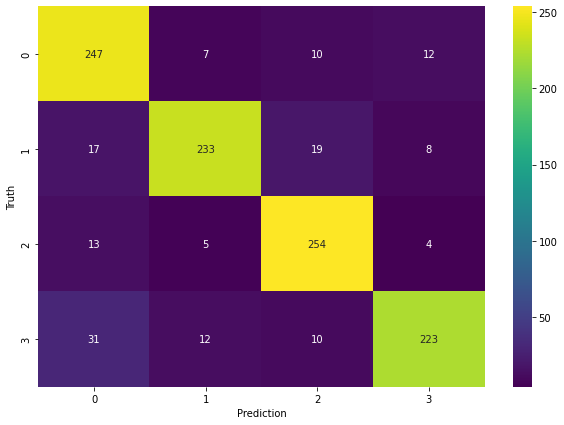

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d',cmap='viridis')
plt.xlabel('Prediction')
plt.ylabel('Truth')